In [1]:
%matplotlib inline
import albumentations as A
import albumentations.pytorch
from albumentations.core.transforms_interface import ImageOnlyTransform
import cv2
import numpy as np
from numpy import linalg as LA
import random
import pandas as pd
import sys
import os
import numpy as np
# import openslide
import matplotlib.pyplot as plt
sys.path.append('../')

from augment import *

In [2]:
from __future__ import print_function

import girder_client
import numpy as np
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [9]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_D_0001/'
img_list = os.listdir(data_path)

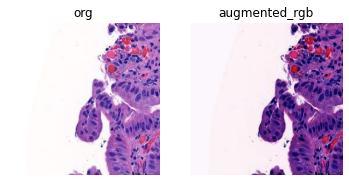

In [10]:
img = cv2.imread(data_path + img_list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
augmented_rgb = rgb_perturb_stain_concentration(img)

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img)
ax1.set_title('org')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(augmented_rgb)
ax2.set_title('augmented_rgb')
ax2.axis("off")
 
plt.show()

In [57]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0001/'
img_list = os.listdir(data_path)

w_list = []
for img in img_list :
#     print(data_path + img)
    img = cv2.imread(data_path + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _, StainsFloat, W_source  = color_deconvolution_routine(img)
    w_list.append(W_source)

In [58]:
print(w_list[0])

[[ 0.59987154  0.16595018 -0.00439671]
 [ 0.74797944  0.92100103  0.35808837]
 [ 0.28404382  0.35244523 -0.93367735]]


In [59]:
# w_list
w_m = np.stack(w_list)
w_m = w_m.reshape(w_m.shape[0], -1)

In [60]:
w_m_mean = np.mean(w_m, axis=0)
print(w_m_mean.reshape(3,3))
w_m = w_m - w_m_mean


[[ 0.63424957  0.21762245 -0.00798583]
 [ 0.729011    0.91831665  0.33652149]
 [ 0.25510948  0.32618591 -0.93778525]]


In [39]:
np.matmul(w_m.T, w_m).diagonal()/len(w_list)

array([0.02830654, 0.13289013, 0.3326617 , 0.01244491, 0.01318785,
       0.09765838, 0.03181432, 0.03312518, 0.01182877])

In [44]:
data_path = '../patches/train_data/Stomach/D/anno_stomach_D_0001/'
img_list = os.listdir(data_path)

w_list = []
for img in img_list :
#     print(data_path + img)
    img = cv2.imread(data_path + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _, StainsFloat, W_source  = color_deconvolution_routine(img)
    w_list.append(W_source)

In [62]:
# print(w_list[3])

In [52]:
# w_list
w_m = np.stack(w_list)
w_m = w_m.reshape(w_m.shape[0], -1)

w_m_mean = np.mean(w_m, axis=0)
print(w_m_mean.reshape(3,3))
w_m = w_m - w_m_mean

[[ 0.63854984  0.25636421 -0.05117216]
 [ 0.72885336  0.89928835  0.35397438]
 [ 0.24388358  0.33553481 -0.92226462]]


In [49]:
np.matmul(w_m.T, w_m).diagonal()/len(w_list)

array([0.00065677, 0.00898682, 0.01403966, 0.00041784, 0.00089867,
       0.00493876, 0.00047306, 0.00308875, 0.0025331 ])

(897, 9)

In [53]:
data_path = '../patches/train_data/Stomach/N/train_stomach_N_0001/'
img_list = os.listdir(data_path)

w_list = []
for img in img_list :
#     print(data_path + img)
    img = cv2.imread(data_path + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _, StainsFloat, W_source  = color_deconvolution_routine(img)
    w_list.append(W_source)

In [61]:
# print(w_list[3])

In [55]:
# w_list
w_m = np.stack(w_list)
w_m = w_m.reshape(w_m.shape[0], -1)

w_m_mean = np.mean(w_m, axis=0)
print(w_m_mean.reshape(3,3))
w_m = w_m - w_m_mean

[[ 0.59097184  0.10477949  0.00448613]
 [ 0.75715385  0.93158458  0.32285564]
 [ 0.27276004  0.33462723 -0.92444936]]


In [56]:
np.matmul(w_m.T, w_m).diagonal()/len(w_list)

array([0.00059372, 0.00475015, 0.0318016 , 0.0008051 , 0.00033253,
       0.00834236, 0.00167347, 0.00411337, 0.00099354])

[[ 0.59987154  0.16595018 -0.00439671]
 [ 0.74797944  0.92100103  0.35808837]
 [ 0.28404382  0.35244523 -0.93367735]]
[[1.00000000e+00 8.88548515e-01 2.57078876e-17]
 [8.88548515e-01 1.00000000e+00 5.74721573e-17]
 [2.57078876e-17 5.74721573e-17 1.00000000e+00]]


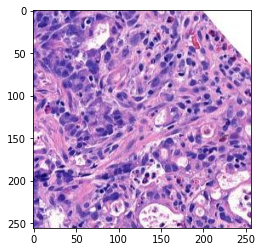

In [96]:
img = cv2.imread(data_path + img_list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
plt.imshow(img)
_, StainsFloat, W_source  = color_deconvolution_routine(img)
print(W_source)
print(np.matmul(W_source.T, W_source))

In [67]:
# -np.log(im_rgb/(1.*I_0)) * 255/np.log(I_0)

In [76]:
I_0 = 256
od_img = -np.log((img.astype(np.float)+1)/(1.*I_0)) * 255/np.log(I_0)

In [84]:
od_img = od_img - od_img.reshape(-1, 3).mean(axis=0)

In [87]:
od_img_flat = od_img.reshape(-1,3)
od_img_flat

In [92]:
cov = np.matmul(od_img_flat.T, od_img_flat)/(len(od_img_flat)-1)

In [93]:
eigen, mat = np.linalg.eig(cov)

In [95]:
np.matmul(mat.T, mat)

array([[ 1.00000000e+00, -2.63677968e-16, -1.66533454e-16],
       [-2.63677968e-16,  1.00000000e+00, -4.49640325e-15],
       [-1.66533454e-16, -4.49640325e-15,  1.00000000e+00]])

In [97]:
mat

array([[ 0.55596023,  0.82403557,  0.10896607],
       [ 0.77383503, -0.46525869, -0.42978331],
       [ 0.30345932, -0.32326419,  0.89633292]])